In [35]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt


In [36]:
# look here! https://towardsdatascience.com/q-learning-for-beginners-2837b777741
# Initialize the FrozenLake environment
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=True, render_mode="ansi")

# Q-learning parameters
alpha = 0.6  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.3  # Exploration rate (at the beginning it shouldn't be too low!!!!)
num_episodes = 300
max_steps = 100

# Initialize the Q-table with zeros
q_table = np.zeros((env.observation_space.n, env.action_space.n))

print('Q-table before training:')
print(q_table)


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [37]:
# Function to choose the next action
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(q_table[state, :])  # Exploit

# Training the agent
rewards = []

for episode in range(num_episodes):
    if episode % 100 == 0:
        print(f'Running episode {episode}/{num_episodes}')
    state = env.reset()[0]
    total_rewards = 0

    for step in range(max_steps):
        action = choose_action(state)
        new_state, reward, done, truncated, info = env.step(action)
        
        # Update Q-table
        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[new_state, :]) - q_table[state, action])
        
        state = new_state
        total_rewards += reward
        
        if done:
            break

    rewards.append(total_rewards)
    print(q_table)

print('Q-table after training:')
print(q_table)

Running episode 0/300
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]

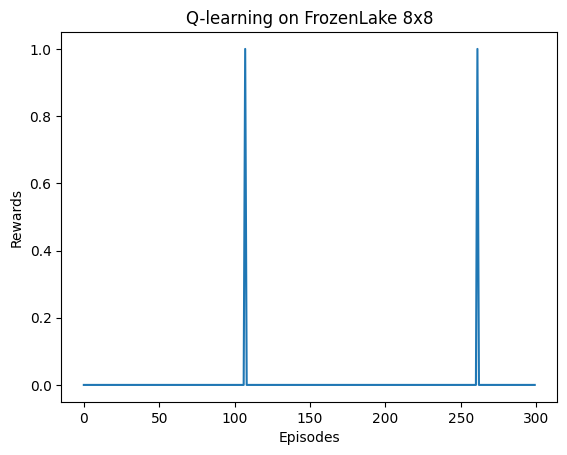

In [38]:

# Plotting the results
plt.plot(range(num_episodes), rewards)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Q-learning on FrozenLake 8x8')
plt.show()


In [39]:

# Testing the trained agent
total_test_episodes = 100
total_test_rewards = 0

for episode in range(total_test_episodes):
    state = env.reset()[0]
    episode_rewards = 0
    
    for step in range(max_steps):
        action = np.argmax(q_table[state, :])
        new_state, reward, done, truncated, info = env.step(action)
        
        episode_rewards += reward
        state = new_state
        
        if done:
            suc = 1
            break
            
    total_test_rewards += episode_rewards


print(f"Average reward over {total_test_episodes} test episodes: {total_test_rewards / total_test_episodes}")

Average reward over 100 test episodes: 0.0


In [40]:

# Extract and print the best policy
def extract_policy(q_table):
    policy = []
    for state in range(env.observation_space.n):
        best_action = np.argmax(q_table[state])
        policy.append(best_action)
    return policy

def action_to_char(action):
    return ['L', 'D', 'R', 'U'][action]

policy = extract_policy(q_table)
policy_moves = [action_to_char(action) for action in policy]

print("Best policy moves:")
for i in range(0, len(policy_moves), 8):
    print(policy_moves[i:i+8])

# Display the FrozenLake map
print("\nFrozenLake Map:")
print(env.render())

env.close()

Best policy moves:
['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']
['L', 'L', 'L', 'L', 'L', 'L', 'D', 'L']

FrozenLake Map:
  (Left)
SFFF
FHFH
FFFH
HFFG



In [41]:
import numpy as np 
    
env = gym.make('FrozenLake8x8-v1', render_mode="human")


observation, info = env.reset(seed=42)

for _ in range(30):
   action = env.action_space.sample()
   observation, reward, terminated, truncated, info = env.step(action)

   if terminated or truncated:
      observation, info = env.reset()
env.close()